In [ ]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 974 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# Import Drive API and authenticate.
from google.colab import drive
# Mount your Drive to the Colab VM.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas_datareader as pdr
import seaborn as sns
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as smf
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# eth_df = pdr.DataReader(['ETH-USD'], 'yahoo', start='2019-01-01', end='2022-12-31')
eth_df = yf.download(['ETH-USD'], start="2019-01-01", end="2022-11-21")
eth_close = pd.DataFrame(eth_df['Close'])
doge_df = yf.download(['DOGE-USD'], start="2019-01-01", end="2022-11-21")
doge_close = pd.DataFrame(doge_df['Close'])
btc_df = yf.download(['BTC-USD'], start="2019-01-01", end="2022-11-21")
btc_close = pd.DataFrame(btc_df['Close'])
crypto_close = eth_close.merge(doge_close.merge(btc_close, on='Date'), on='Date')
# eth_close = eth_df.xs('Close', level='Attributes', axis=1, drop_level=True)
# eth_close.index = eth_close.index.astype('datetime64[ns]') 
crypto_close.columns = ['ETH', 'DOGE', 'BTC']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
crypto_close

,ETH,DOGE,BTC
Date,,,
2019-01-01,140.819412,0.002392,3843.520020
2019-01-02,155.047684,0.002407,3943.409424
2019-01-03,149.135010,0.002360,3836.741211
2019-01-04,154.581940,0.002315,3857.717529
2019-01-05,155.638596,0.002319,3845.194580
...,...,...,...
2022-11-11,1287.221069,0.084885,17034.292969
2022-11-12,1255.268311,0.088039,16799.185547
2022-11-13,1221.819214,0.084893,16353.365234


In [ ]:
nltk.download('stopwords')
# import spacy
# nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# !pip install -U spacy
# !pip install spacy
# !pip install spacy.load("en_core_web_sm")

In [ ]:
# all_files=['$ETH_tweets2019','$ETH_tweets2020','$ETH_tweets2021','$ETH_tweets2022']
all_files =['ElonTweets']
path ='/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/'
df =pd.DataFrame()

for filename in all_files:
    my_pd = pd.DataFrame()
    my_pd = pd.read_csv(path + filename + '.csv', index_col=0, parse_dates=True)
    my_pd.columns.values[0:4] = ['Datetime', 'Tweet Id', 'Text', 'Username']
    df = pd.concat([df, my_pd], axis=0)

In [ ]:
df = df.set_index('Datetime')

In [ ]:
# df= pd.read_csv('ElonTweets.csv', index_col='Datetime', parse_dates=True)
df_crypto = pd.read_csv('crypto_tweets.csv', index_col ='Datetime', parse_dates=True)
# df_ethereum = pd.read_csv('#Ethereum_tweets.csv', index_col ='Datetime', parse_dates=True)
# # df_eth = pd.read_csv('Eth_tweets.csv', index_col ='Datetime', parse_dates=True)
# df_ETH2 = pd.read_csv('$ETH_tweets.csv', index_col ='Datetime', parse_dates=True)

In [ ]:
# df_eth = pd.read_csv('eth_tweets2.csv', index_col ='Datetime', parse_dates=True)

In [ ]:
df_tweets = df.iloc[:,1:]
# df_tweets
# df_crypto_tweets = df_crypto.iloc[:,2:]
# df_ethereum_tweets = df_ethereum.iloc[:,2:]
# df_ETH2_tweets = df_ETH2.iloc[:,2:] 
# df_tweets.drop(columns=['Username'], inplace=True)
# df_crypto_tweets.drop(columns=['Username'], inplace=True)
# df_ethereum_tweets.drop(columns=['Username'], inplace=True)
# df_ETH2_tweets.drop(columns=['Username'], inplace=True)
df_tweets['Text'].astype(str)
df_tweets = df_tweets.dropna()
df_tweets

,Text,Username
Datetime,,
2022-11-02 21:43:59+00:00,🤔 https://t.co/XuJdfMTTi1,elonmusk
2022-11-02 21:04:56+00:00,https://t.co/BYOBGBHOUA,elonmusk
2022-11-02 20:56:27+00:00,"@AOC Your feedback is appreciated, now pay $8",elonmusk
2022-11-02 20:09:41+00:00,Advertisers should support:,elonmusk
2022-11-02 19:53:20+00:00,@itsALLrisky 🤣,elonmusk
...,...,...
2019-10-14 16:30:37+00:00,@annerajb @tesla_addicted Software,elonmusk
2019-10-14 16:30:13+00:00,@SteveMartineau6 @annerajb @YogiSC1127 @Tesla Yes,elonmusk
2019-10-14 16:29:44+00:00,@tesla_addicted Will start rendering traffic c...,elonmusk


In [ ]:
#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text

df_tweets['cleanedTweets'] = df_tweets['Text'].apply(cleanTweets) #apply cleanTweet function to the tweet
# df_crypto_tweets['cleanedTweets'] = df_crypto_tweets['Text'].apply(cleanTweets)
# df_ethereum_tweets['cleanedTweets'] = df_ethereum_tweets['Text'].apply(cleanTweets)
# df_ETH2_tweets['cleanedTweets'] = df_ETH2_tweets['Text'].apply(cleanTweets)

# df_tweets.head() #compares original tweets with cleaned Tweets
# savedTweets = df_tweets.copy()
# savedTweets_crypto = df_crypto_tweets.copy()
# savedTweets_ethereum = df_ethereum_tweets.copy()
# savedTweets_ETH2 = df_ETH2_tweets.copy()


In [ ]:
df_tweets
savedTweets = df_tweets.copy()

In [ ]:
#Get Subjectivity and Polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

# savedTweets_crypto['Subjectivity'] = savedTweets_crypto['cleanedTweets'].apply(getSubjectivity)
# savedTweets_crypto['Polarity'] = savedTweets_crypto['cleanedTweets'].apply(getPolarity)

# savedTweets_ethereum['Subjectivity'] = savedTweets_ethereum['cleanedTweets'].apply(getSubjectivity)
# savedTweets_ethereum['Polarity'] = savedTweets_ethereum['cleanedTweets'].apply(getPolarity)

# savedTweets_ETH2['Subjectivity'] = savedTweets_ETH2['cleanedTweets'].apply(getSubjectivity)
# savedTweets_ETH2['Polarity'] = savedTweets_ETH2['cleanedTweets'].apply(getPolarity)



In [ ]:
savedTweets.drop('Text', axis=1).head() 
# savedTweets_crypto.drop('Text', axis=1).head() 
# savedTweets_ethereum.drop('Text', axis=1).head() 
# savedTweets_ETH2.drop('Text', axis=1).head() 

,Username,cleanedTweets,Subjectivity,Polarity
Datetime,,,,
2022-11-02 21:43:59+00:00,elonmusk,🤔,0.0,0.0
2022-11-02 21:04:56+00:00,elonmusk,,0.0,0.0
2022-11-02 20:56:27+00:00,elonmusk,"Your feedback is appreciated, now pay $8",0.1,0.2
2022-11-02 20:09:41+00:00,elonmusk,Advertisers should support:,0.0,0.0
2022-11-02 19:53:20+00:00,elonmusk,🤣,0.0,0.0


In [ ]:
savedTweets.index = savedTweets.index.astype('datetime64[ns]')

In [ ]:
# #Concat

# tweets_concat = pd.concat([savedTweets_crypto, savedTweets_ethereum, savedTweets_ETH2])
# tweets_concat


In [ ]:
#Average Polarity of all the tweets
avg_polarity = savedTweets.resample('D').mean()
avg_polarity.dropna(inplace=True)
avg_polarity.index = avg_polarity.index.rename('Date')
avg_polarity.index = avg_polarity.index.astype('datetime64[ns]') 
avg_polarity

,Subjectivity,Polarity
Date,,
2019-10-14,0.394786,0.123635
2019-10-15,0.480795,0.217839
2019-10-16,0.333333,0.258333
2019-10-17,0.225000,-0.081667
2019-10-21,0.549495,0.202104
...,...,...
2022-10-29,0.261932,0.237879
2022-10-30,0.355179,0.172679
2022-10-31,0.220657,0.080939


In [ ]:
final_df_all = pd.concat([crypto_close, avg_polarity], axis=1)
final_df_all.dropna(inplace=True)

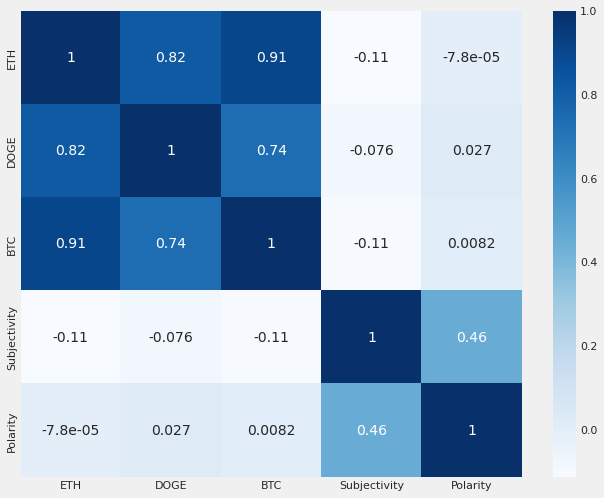

In [ ]:
cor= final_df_all.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor,cmap="Blues", annot=True)

In [ ]:
final_df = pd.concat([eth_close, avg_polarity], axis=1)
final_df.dropna(inplace=True)

In [ ]:
final_df_all

,ETH,DOGE,BTC,Subjectivity,Polarity
Date,,,,,
2019-10-14,186.960907,186.960907,186.960907,0.394786,0.123635
2019-10-15,181.406067,181.406067,181.406067,0.480795,0.217839
2019-10-16,176.013504,176.013504,176.013504,0.333333,0.258333
2019-10-17,178.028351,178.028351,178.028351,0.225000,-0.081667
2019-10-21,174.920990,174.920990,174.920990,0.549495,0.202104
...,...,...,...,...,...
2022-10-29,1619.698486,1619.698486,1619.698486,0.261932,0.237879
2022-10-30,1590.783325,1590.783325,1590.783325,0.355179,0.172679
2022-10-31,1572.714478,1572.714478,1572.714478,0.220657,0.080939


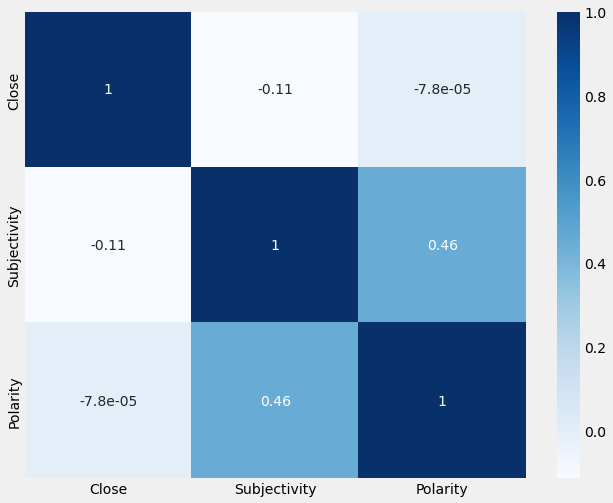

In [ ]:
cor= final_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cor,cmap="Blues", annot=True)

In [ ]:
#do we want to make the shift here??
# final_df['ETH-USD']= final_df['ETH-USD'].shift(periods=-1)

In [ ]:
final_df_scaled = pd.DataFrame(preprocessing.scale(final_df))
final_df_scaled

,0,1,2
0,-1.092266,0.472094,-0.016368
1,-1.096445,1.008700,0.684047
2,-1.100502,0.088698,0.985126
3,-1.098986,-0.587182,-1.542811
4,-1.101324,1.437309,0.567057
...,...,...,...
1033,-0.014318,-0.356769,0.833044
1034,-0.036072,0.224989,0.348273
1035,-0.049667,-0.614281,-0.333823
1036,-0.044408,-0.493368,-0.737134


In [ ]:
# Linear regression - Polarity &subjectivity
LR_df = final_df_scaled.copy()
LR_df.replace([np.inf, -np.inf], np.nan, inplace=True)
LR_df.dropna(inplace=True)

X = LR_df.iloc[:,1:3]
# Y = final_df['ETH-USD']
Y = final_df_all['BTC']
Y = Y.reset_index()
Y.drop(columns=['Date'], inplace=True)

X_test = X.iloc[519:]
X_train = X.iloc[:519]

Y_test = Y.iloc[519:]
Y_train = Y.iloc[:519]

LR= LinearRegression().fit(X_train, Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred = LR.predict(X_test)

In [ ]:
statistics_LR = smf.OLS(Y, smf.add_constant(X))
lR_summ = statistics_LR.fit()
lR_summ.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BTC   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     8.029
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           0.000347
Time:                        00:33:45   Log-Likelihood:                -11620.
No. Observations:                1038   AIC:                         2.325e+04
Df Residuals:                    1035   BIC:                         2.326e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.846e+04    546.875     52.038      0.000    2.74e+04    2.95e+04
1          -2455.9828    614.247     -3.998      0.000   -3661.294   -1250.672
2           1263.8142    614.247      2.058      0.040      58.503    2469.125
==============================================================================
Omnibus:                      957.773   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.943
Skew:                           0.315   Prob(JB):                     1.61e-18
Kurtosis:                       1.776   Cond. No.                         1.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
rmse_train = r2_score(Y_train,Y_pred_train)
rmse_test = r2_score(Y_test,Y_pred)
print("R-squared training: {}".format(rmse_train))
print("R-squared test: {}".format(rmse_test))

R-squared training: 0.00871941283790878
R-squared test: -2.2612582792739713


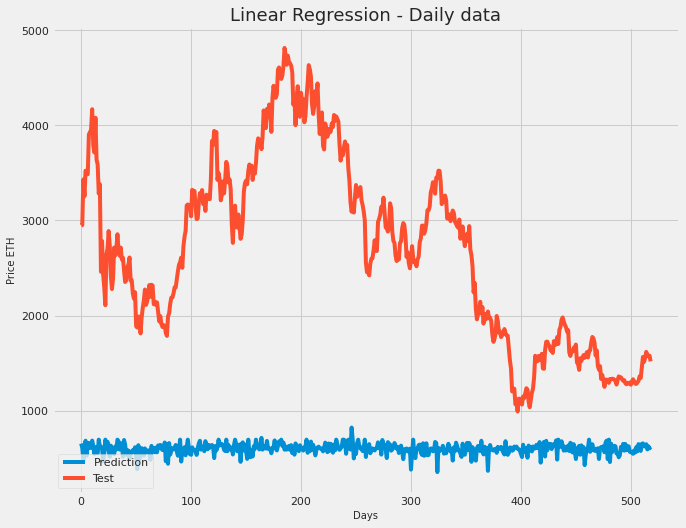

In [ ]:
plt.xlabel("Days", fontsize=10)
plt.ylabel("Price ETH", fontsize=10)
plt.title("Linear Regression - Daily data", fontsize=18)
plt.plot(Y_pred, label="Prediction")
plt.plot(Y_test.values, label="Test")
plt.legend(loc='lower left')
plt.savefig('LR_Daily.png')

In [ ]:
tweets_concat

In [ ]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [ ]:
savedTweets

In [ ]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Neutral     4499
Positive    4331
Negative    1171
Name: Analysis, dtype: int64

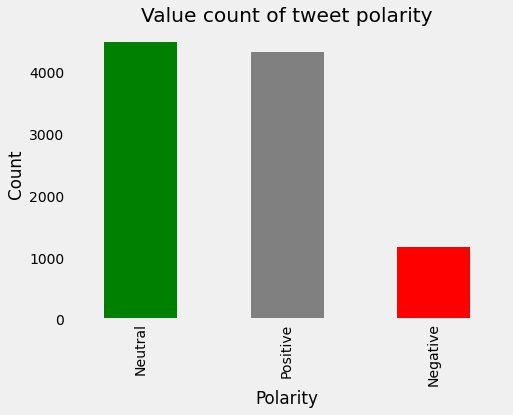

In [ ]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

NameError: ignored

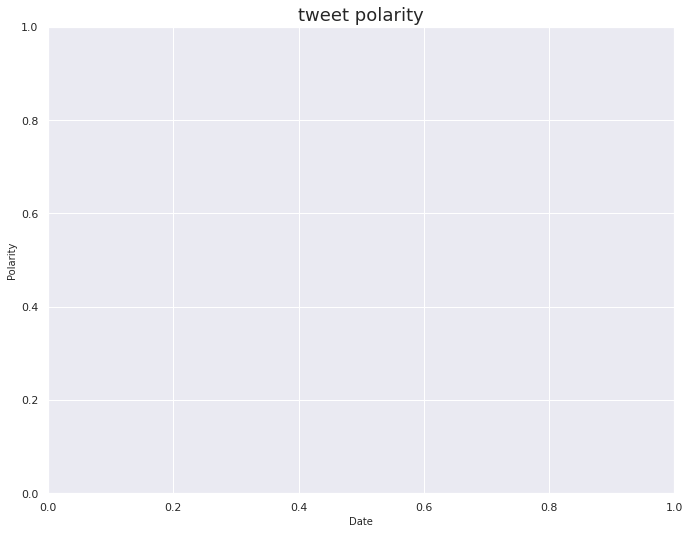

In [ ]:
sns.set(rc={'figure.figsize': (10,8)})
plt.xlabel("Date", fontsize=10)
plt.ylabel("Polarity", fontsize=10)
plt.title("tweet polarity", fontsize=18)
plt.plot(tweets_concat['Polarity'], label="Polarity")
plt.legend(loc='lower left')
# plt.savefig('Roll_futures.png')

In [ ]:
# #plot the polarity and subjectivity on a scatter plot
# plt.figure(figsize=(9,7))
# for i in range(0,tweets_concat.shape[0]):
#     plt.scatter(tweets_concat['Polarity'][i],tweets_concat['Subjectivity'][i], color='blue')
# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

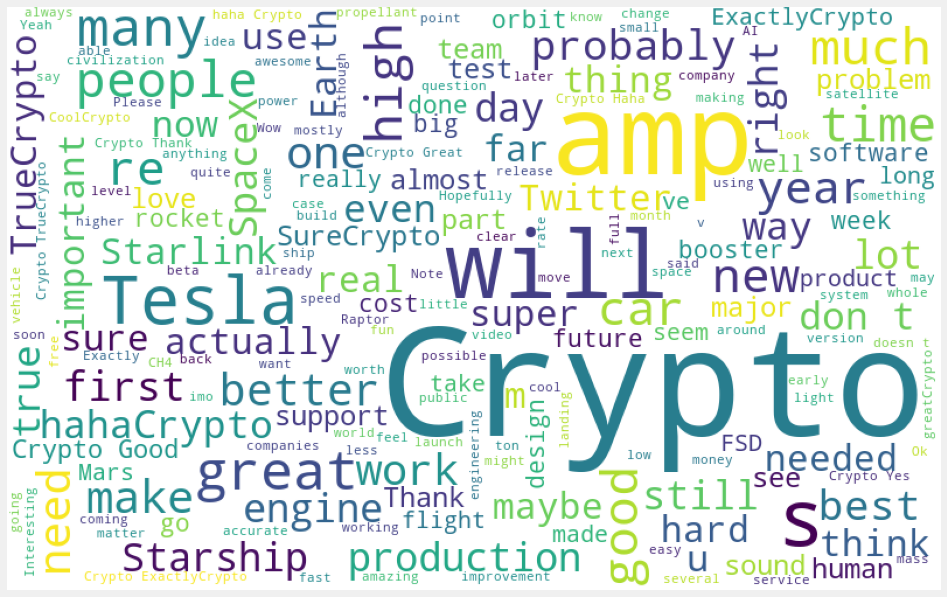

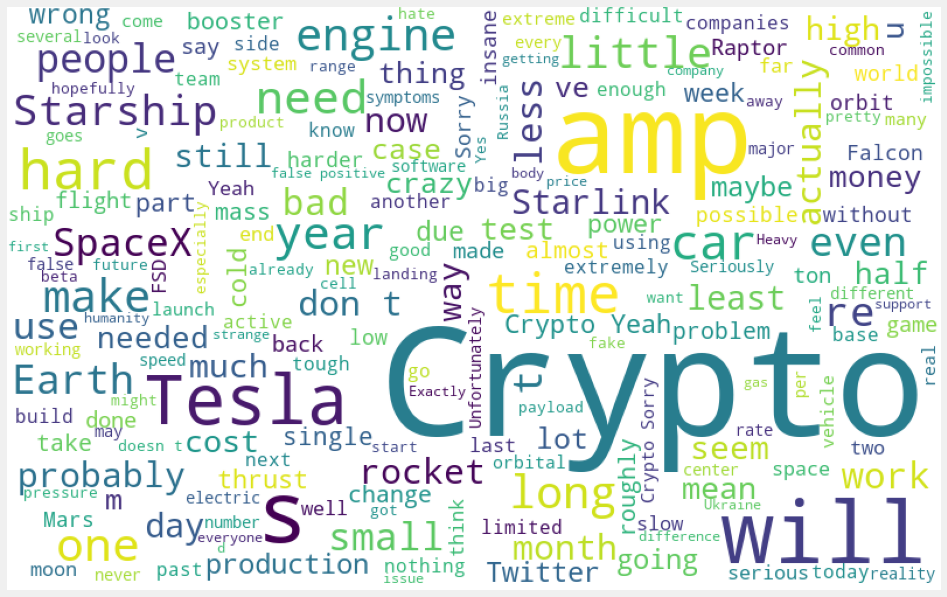

In [ ]:
# #create a function for wordcloud
def create_wordcloud(text):
    # here change the world
    allWords = 'Crypto '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

In [ ]:
savedTweets

In [ ]:
#break each tweet sentence into words
sentences = []
for word in savedTweets['cleanedTweets']:
    sentences.append(word)
sentences
lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] #shows first 10 words in the first tweet

['🤔',
 'Your',
 'feedback',
 'is',
 'appreciated,',
 'now',
 'pay',
 '$8',
 'Advertisers',
 'should']

In [ ]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    #nlp has more stopwords - couldnt install it!!
    if word not in stopwords.words('english'):
        stem2.append(word)
#creates a new dataframe for the stem and shows the count of the most used words
df = pd.DataFrame(stem2)
df=df[0].value_counts()
df #shows the new dataframe

&amp;    1402
tesla     546
make      326
good      296
need      295
         ... 
were.       1
lose,       1
grue.       1
odd?        1
venus       1
Name: 0, Length: 13893, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


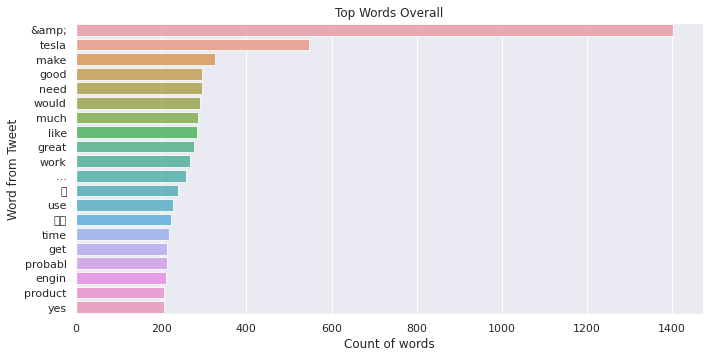

In [ ]:
#plots the top 20 used words
df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# print(stopwords.words('english'))

In [ ]:
#Linear regression

